In [24]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, 
                           confusion_matrix, roc_curve, roc_auc_score,
                           precision_recall_curve, f1_score)
import warnings
warnings.filterwarnings('ignore')

# Настройка отображения графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline



In [25]:
# Загрузка данных
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

df = pd.read_csv('adult.csv', names=column_names, na_values=' ?', skipinitialspace=True)

# Первичный осмотр данных
print("Размер данных:", df.shape)
print("\nПервые 5 строк:")
display(df.head())

Размер данных: (32562, 15)

Первые 5 строк:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


In [26]:
# Базовая информация о данных
print("Информация о данных:")
print(df.info())
print("\nСтатистическое описание числовых признаков:")
print(df.describe())

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32562 non-null  object
 1   workclass       32562 non-null  object
 2   fnlwgt          32562 non-null  object
 3   education       32562 non-null  object
 4   education-num   32562 non-null  object
 5   marital-status  32562 non-null  object
 6   occupation      32562 non-null  object
 7   relationship    32562 non-null  object
 8   race            32562 non-null  object
 9   sex             32562 non-null  object
 10  capital-gain    32562 non-null  object
 11  capital-loss    32562 non-null  object
 12  hours-per-week  32562 non-null  object
 13  native-country  32562 non-null  object
 14  income          32562 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB
None

Статистическое описание числовых признаков:
          age workclass  fnlwgt

In [27]:
# Проверка пропущенных значений
print("Пропущенные значения:")
print(df.isnull().sum())

# Обработка пропущенных значений
print(f"\nДанные до удаления пропусков: {df.shape}")
df_clean = df.dropna()
print(f"Данные после удаления пропусков: {df_clean.shape}")

Пропущенные значения:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Данные до удаления пропусков: (32562, 15)
Данные после удаления пропусков: (32562, 15)


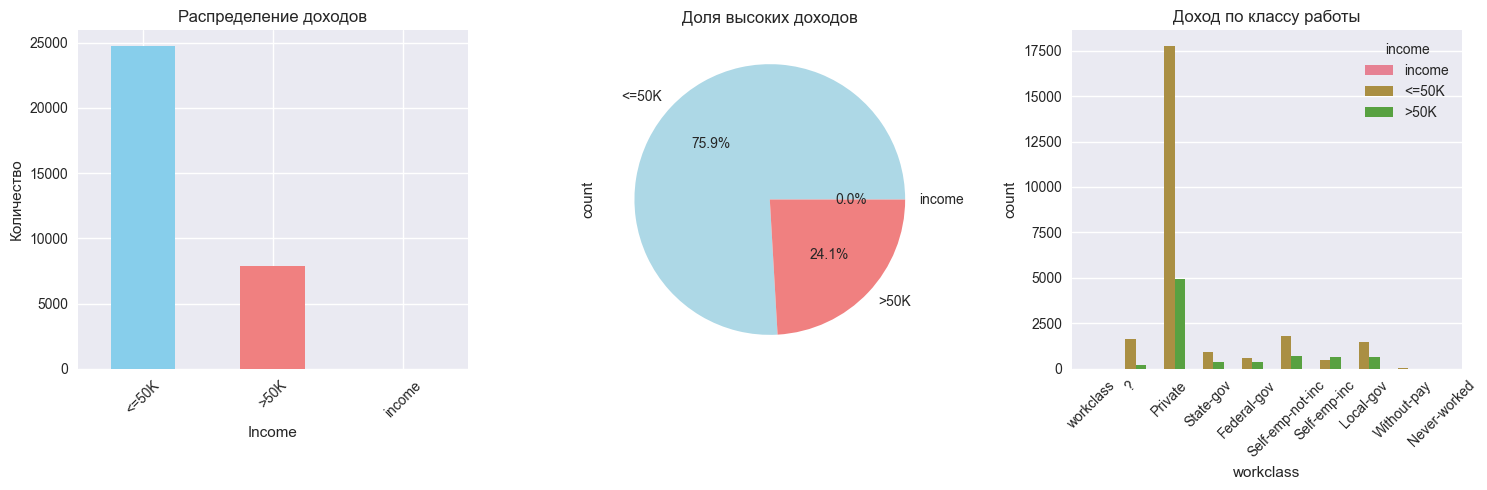

Распределение целевой переменной:
income
<=50K     24720
>50K       7841
income        1
Name: count, dtype: int64
Доля высоких доходов: 24.08%


In [28]:
# Анализ целевой переменной
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df_clean['income'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Распределение доходов')
plt.xlabel('Income')
plt.ylabel('Количество')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
df_clean['income'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                      colors=['lightblue', 'lightcoral'])
plt.title('Доля высоких доходов')

plt.subplot(1, 3, 3)
# Закодируем целевую переменную для визуализации
df_clean['income_encoded'] = df_clean['income'].map({'<=50K': 0, '>50K': 1})
sns.countplot(data=df_clean, x='workclass', hue='income')
plt.title('Доход по классу работы')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Распределение целевой переменной:")
print(df_clean['income'].value_counts())
print(f"Доля высоких доходов: {(df_clean['income'] == '>50K').mean():.2%}")

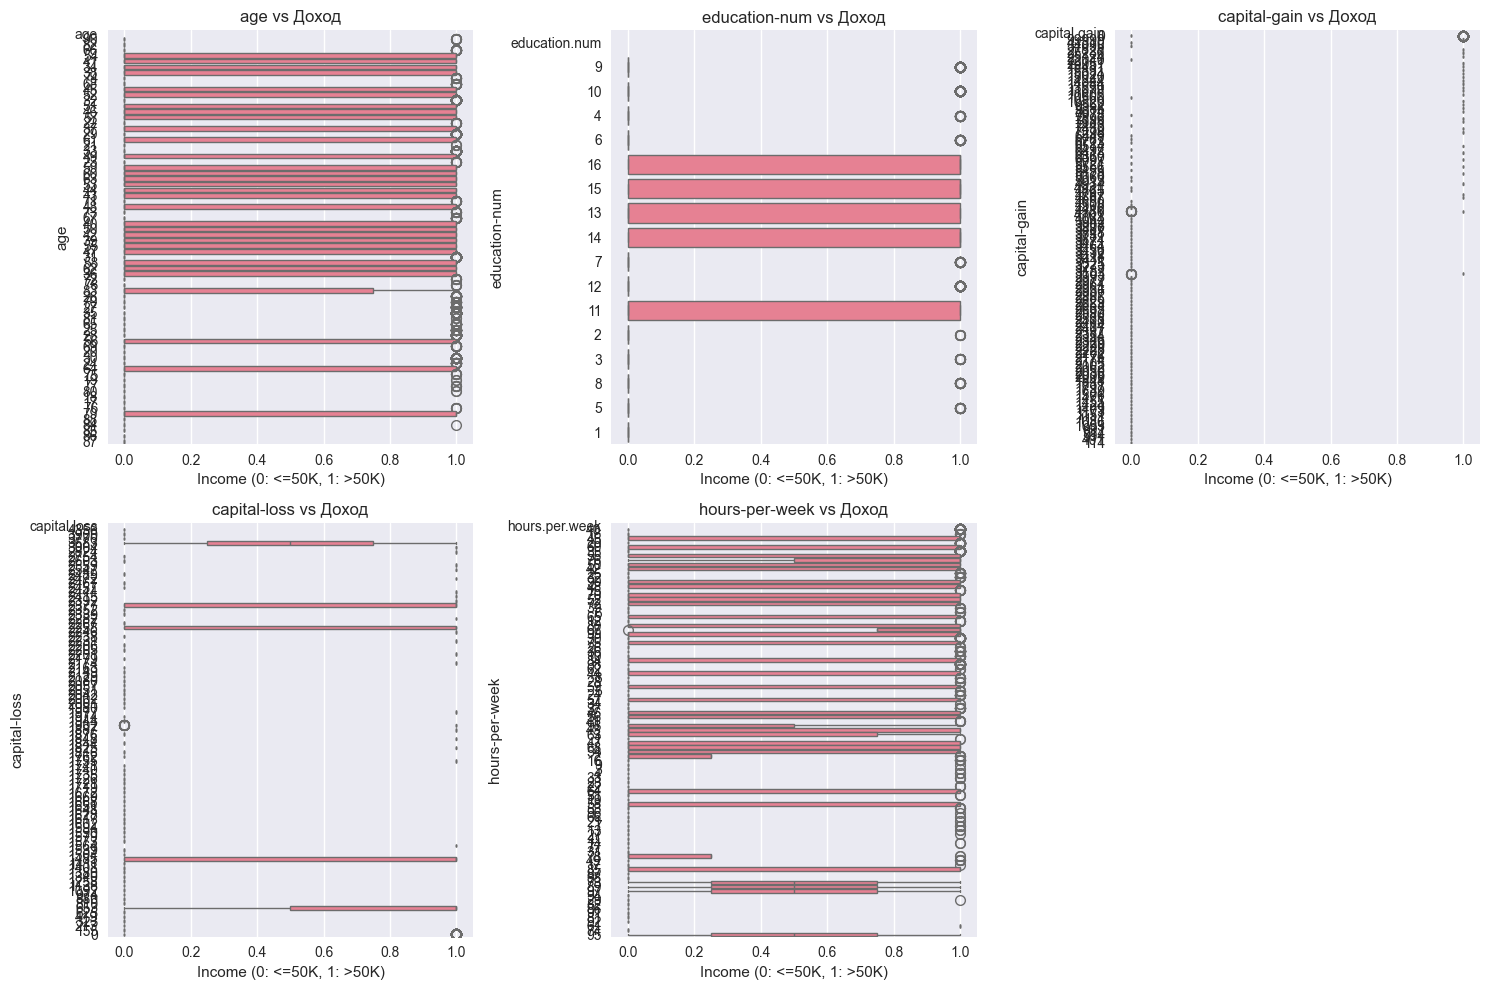

In [29]:
# Анализ числовых признаков
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    # Создаем временную колонку для визуализации
    temp_df = df_clean.copy()
    temp_df['income_binary'] = temp_df['income'].map({'<=50K': 0, '>50K': 1})
    sns.boxplot(x='income_binary', y=feature, data=temp_df)
    plt.title(f'{feature} vs Доход')
    plt.xlabel('Income (0: <=50K, 1: >50K)')
plt.tight_layout()
plt.show()

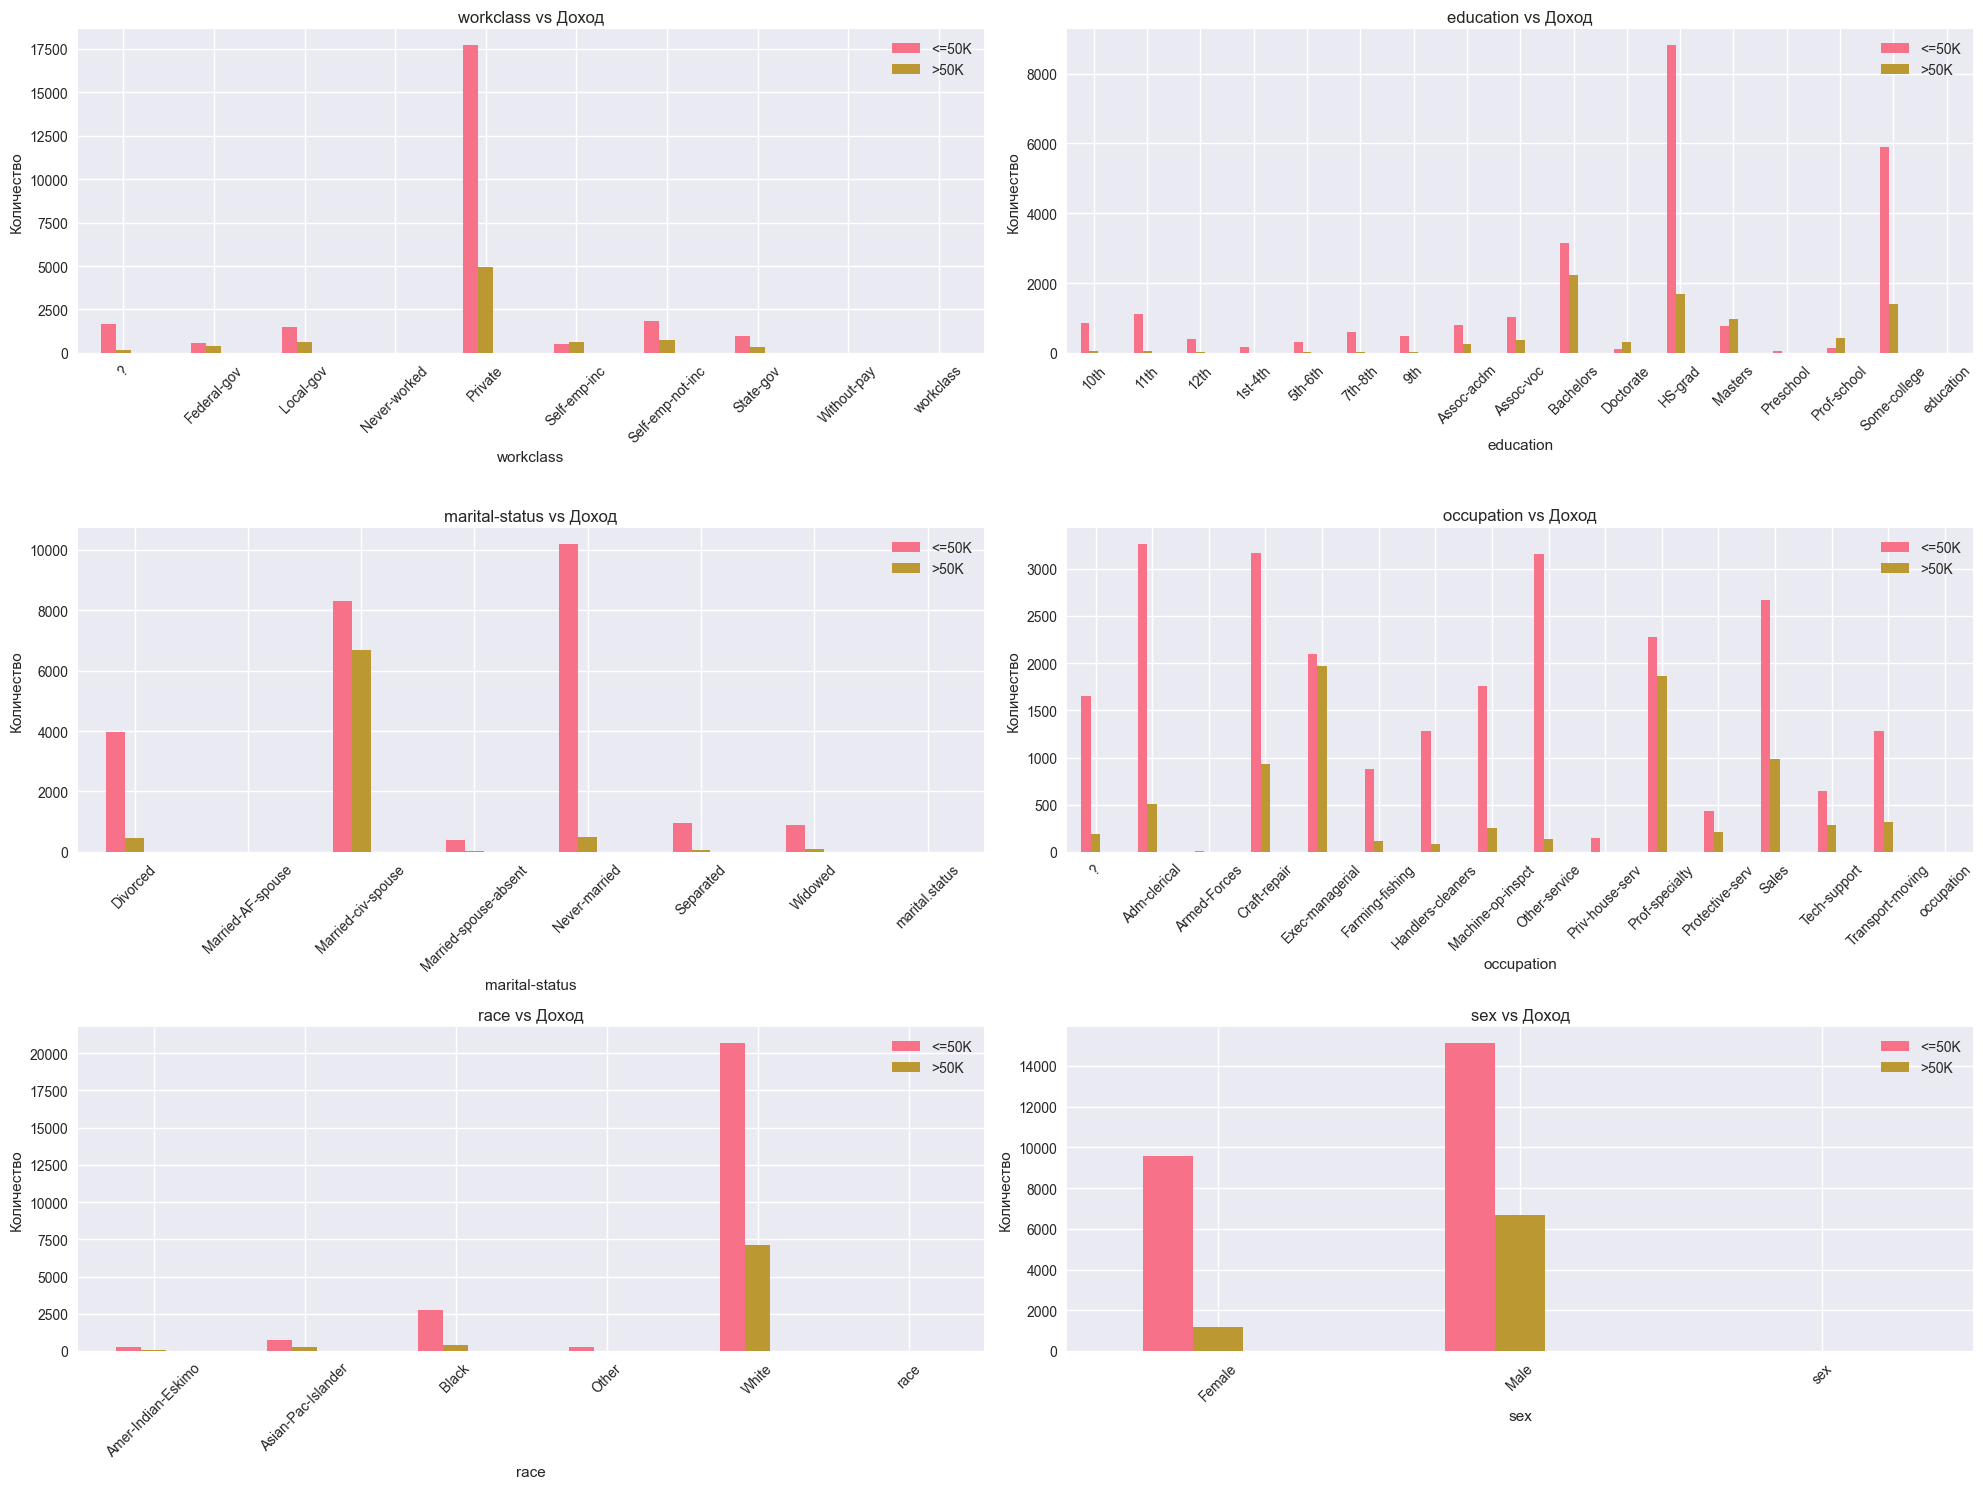

In [30]:
# Анализ категориальных признаков
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'race', 'sex']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    # Группируем данные для визуализации
    cross_tab = pd.crosstab(df_clean[feature], df_clean['income'])
    cross_tab.plot(kind='bar', ax=plt.gca())
    plt.title(f'{feature} vs Доход')
    plt.xlabel(feature)
    plt.ylabel('Количество')
    plt.legend(['<=50K', '>50K'])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# Подготовка данных для моделирования
# Создаем копию данных для моделирования
model_data = df_clean.copy()

# Кодируем целевую переменную
model_data['income_encoded'] = model_data['income'].map({'<=50K': 0, '>50K': 1})

# Выбираем признаки для модели
# Исключаем неинформативные или дублирующие признаки
features_to_drop = ['fnlwgt', 'education', 'income']  # education-num содержит ту же информацию что и education
model_data = model_data.drop(features_to_drop, axis=1)

# Кодируем категориальные переменные
categorical_columns = model_data.select_dtypes(include=['object']).columns

print("Категориальные признаки для кодирования:")
print(categorical_columns)

# Применяем one-hot encoding для категориальных признаков
model_data_encoded = pd.get_dummies(model_data, columns=categorical_columns, drop_first=True)

print(f"\nРазмер данных после кодирования: {model_data_encoded.shape}")
print("Первые 3 строки после кодирования:")
display(model_data_encoded.head(3))

Категориальные признаки для кодирования:
Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country'],
      dtype='object')

Размер данных после кодирования: (32562, 481)
Первые 3 строки после кодирования:


,income_encoded,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_native.country
0,NaN,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [33]:
# БЛОК 9: Разделение на признаки и целевую переменную (ИСПРАВЛЕННЫЙ)

# Сначала проверим есть ли NaN в целевой переменной
print("Проверка NaN в целевой переменной:")
print(f"NaN в income_encoded: {model_data_encoded['income_encoded'].isna().sum()}")

# Если есть NaN, удалим эти строки
if model_data_encoded['income_encoded'].isna().sum() > 0:
    print("Удаляем строки с NaN в целевой переменной...")
    model_data_encoded = model_data_encoded.dropna(subset=['income_encoded'])
    print(f"Размер данных после очистки: {model_data_encoded.shape}")

# Теперь разделяем данные
X = model_data_encoded.drop('income_encoded', axis=1)
y = model_data_encoded['income_encoded']

# Проверим, что нет NaN
print(f"\nПроверка после очистки:")
print(f"NaN в X: {X.isna().sum().sum()}")
print(f"NaN в y: {y.isna().sum()}")

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Доля высоких доходов в обучающей: {y_train.mean():.2%}")
print(f"Доля высоких доходов в тестовой: {y_test.mean():.2%}")

Проверка NaN в целевой переменной:
NaN в income_encoded: 1
Удаляем строки с NaN в целевой переменной...
Размер данных после очистки: (32561, 481)

Проверка после очистки:
NaN в X: 0
NaN в y: 0

Размер обучающей выборки: (26048, 480)
Размер тестовой выборки: (6513, 480)
Доля высоких доходов в обучающей: 24.08%
Доля высоких доходов в тестовой: 24.07%


In [35]:
# БЛОК 10: Масштабирование числовых признаков (ИСПРАВЛЕННЫЙ)

# Найдем правильные названия числовых столбцов
print("Все столбцы в данных:")
print(X_train.columns.tolist())

# Числовые столбцы остались с теми же названиями, проверим какие из них есть
numerical_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Оставим только те, которые действительно есть в данных
available_numerical_cols = [col for col in numerical_cols if col in X_train.columns]
print(f"\nДоступные числовые столбцы: {available_numerical_cols}")

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[available_numerical_cols] = scaler.fit_transform(X_train[available_numerical_cols])
X_test_scaled[available_numerical_cols] = scaler.transform(X_test[available_numerical_cols])

print("\nПризнаки после масштабирования (числовые):")
print(pd.DataFrame(X_train_scaled[available_numerical_cols]).describe())

Все столбцы в данных:
['age_18', 'age_19', 'age_20', 'age_21', 'age_22', 'age_23', 'age_24', 'age_25', 'age_26', 'age_27', 'age_28', 'age_29', 'age_30', 'age_31', 'age_32', 'age_33', 'age_34', 'age_35', 'age_36', 'age_37', 'age_38', 'age_39', 'age_40', 'age_41', 'age_42', 'age_43', 'age_44', 'age_45', 'age_46', 'age_47', 'age_48', 'age_49', 'age_50', 'age_51', 'age_52', 'age_53', 'age_54', 'age_55', 'age_56', 'age_57', 'age_58', 'age_59', 'age_60', 'age_61', 'age_62', 'age_63', 'age_64', 'age_65', 'age_66', 'age_67', 'age_68', 'age_69', 'age_70', 'age_71', 'age_72', 'age_73', 'age_74', 'age_75', 'age_76', 'age_77', 'age_78', 'age_79', 'age_80', 'age_81', 'age_82', 'age_83', 'age_84', 'age_85', 'age_86', 'age_87', 'age_88', 'age_90', 'age_age', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'workclass_workclass', 'education-num_10', 'edu

ValueError: at least one array or dtype is required

In [36]:
# Построение модели логистической регрессии
logreg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Предсказания
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

print("Модель логистической регрессии обучена!")

Модель логистической регрессии обучена!


In [37]:
# Оценка качества модели
print("ТОЧНОСТЬ МОДЕЛИ:")
print("=" * 50)

# Базовая точность
baseline_accuracy = max(y_test.mean(), 1 - y_test.mean())
print(f"Базовая точность (мажоритарный класс): {baseline_accuracy:.2%}")

# Точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2%}")

# Другие метрики
print(f"F1-score: {f1_score(y_test, y_pred):.2%}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.2%}")

print("\nОТЧЕТ КЛАССИФИКАЦИИ:")
print("=" * 50)
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

ТОЧНОСТЬ МОДЕЛИ:
Базовая точность (мажоритарный класс): 75.93%
Точность модели: 83.08%
F1-score: 70.50%
AUC-ROC: 92.11%

ОТЧЕТ КЛАССИФИКАЦИИ:
              precision    recall  f1-score   support

       <=50K       0.94      0.83      0.88      4945
        >50K       0.61      0.84      0.71      1568

    accuracy                           0.83      6513
   macro avg       0.77      0.83      0.79      6513
weighted avg       0.86      0.83      0.84      6513



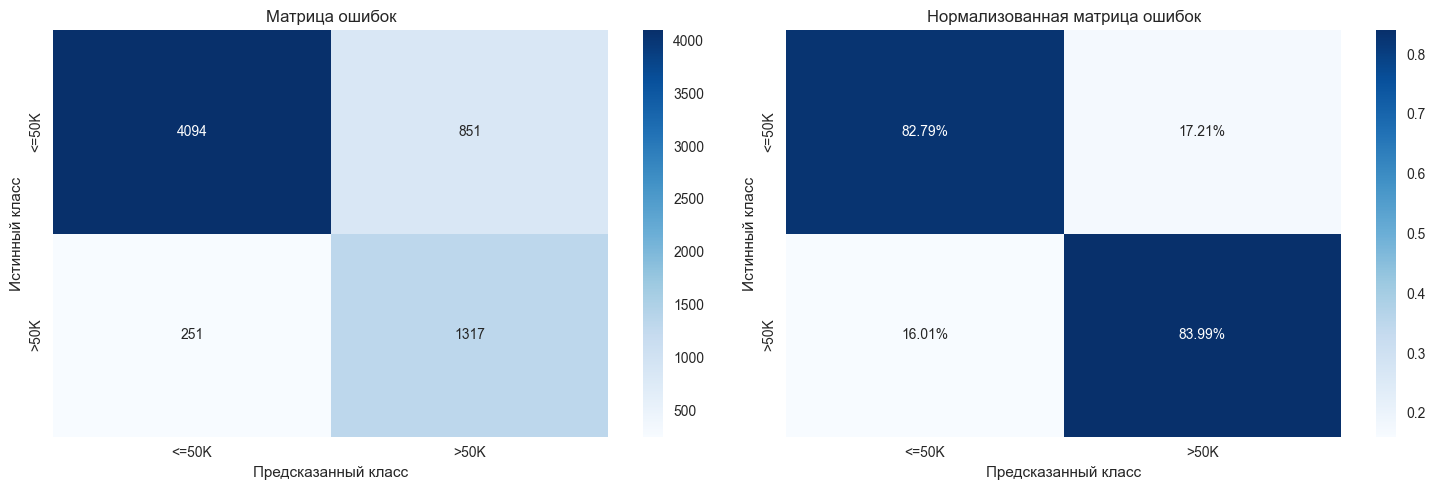

In [38]:
# Матрица ошибок
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['<=50K', '>50K'],
            yticklabels=['<=50K', '>50K'])
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')

plt.subplot(1, 2, 2)
# Нормализованная матрица ошибок
cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['<=50K', '>50K'],
            yticklabels=['<=50K', '>50K'])
plt.title('Нормализованная матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')

plt.tight_layout()
plt.show()

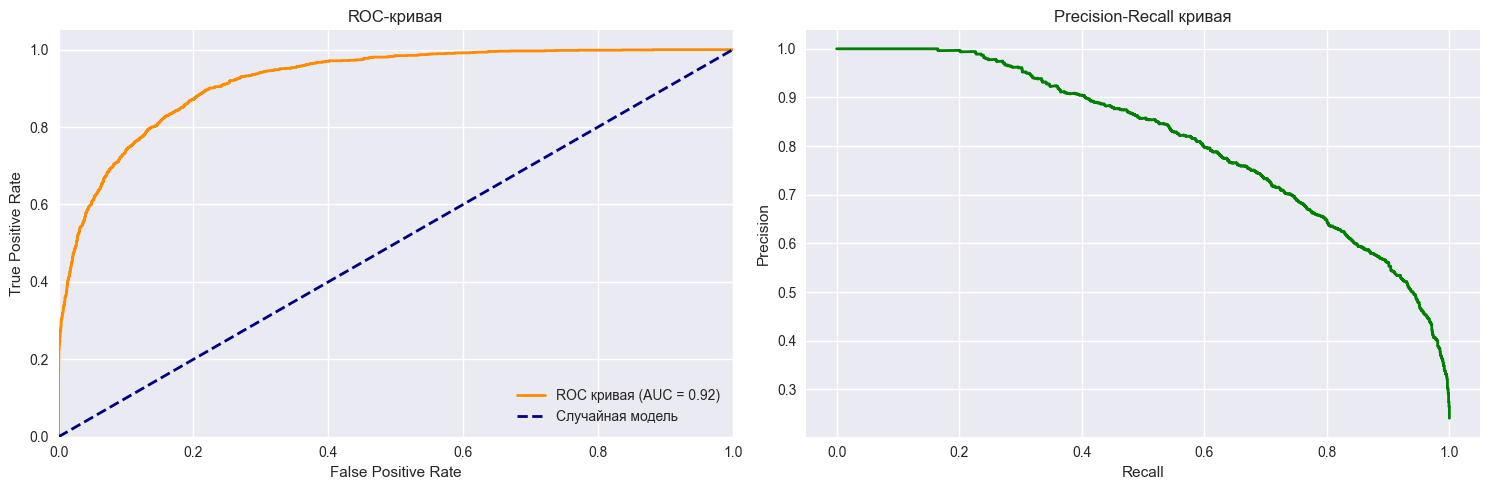

In [39]:
# ROC-кривая и Precision-Recall кривая
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC кривая (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайная модель')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")

# Precision-Recall кривая
plt.subplot(1, 2, 2)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall кривая')
plt.grid(True)

plt.tight_layout()
plt.show()

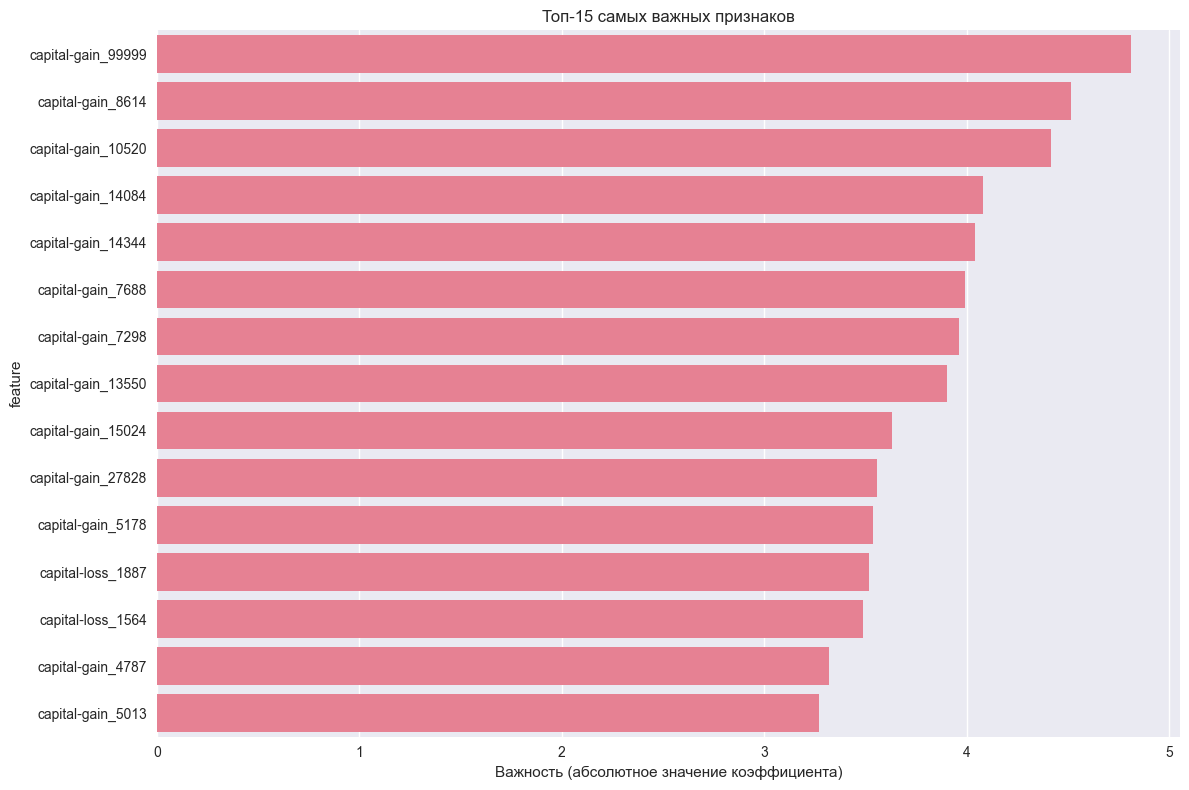

ТОП-10 ВАЖНЕЙШИХ ПРИЗНАКОВ:
capital-gain_99999             | Коэф:   4.813 | увеличивает вероятность высокого дохода
capital-gain_8614              | Коэф:   4.516 | увеличивает вероятность высокого дохода
capital-gain_10520             | Коэф:   4.417 | увеличивает вероятность высокого дохода
capital-gain_14084             | Коэф:   4.080 | увеличивает вероятность высокого дохода
capital-gain_14344             | Коэф:   4.040 | увеличивает вероятность высокого дохода
capital-gain_7688              | Коэф:   3.993 | увеличивает вероятность высокого дохода
capital-gain_7298              | Коэф:   3.961 | увеличивает вероятность высокого дохода
capital-gain_13550             | Коэф:   3.902 | увеличивает вероятность высокого дохода
capital-gain_15024             | Коэф:   3.632 | увеличивает вероятность высокого дохода
capital-gain_27828             | Коэф:   3.555 | увеличивает вероятность высокого дохода


In [40]:
# Анализ важности признаков
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(logreg.coef_[0])
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Топ-15 самых важных признаков')
plt.xlabel('Важность (абсолютное значение коэффициента)')
plt.tight_layout()
plt.show()

print("ТОП-10 ВАЖНЕЙШИХ ПРИЗНАКОВ:")
print("=" * 50)
for idx, row in feature_importance.head(10).iterrows():
    coef = logreg.coef_[0][X.columns.get_loc(row['feature'])]
    effect = "увеличивает" if coef > 0 else "снижает"
    print(f"{row['feature']:30} | Коэф: {coef:7.3f} | {effect} вероятность высокого дохода")

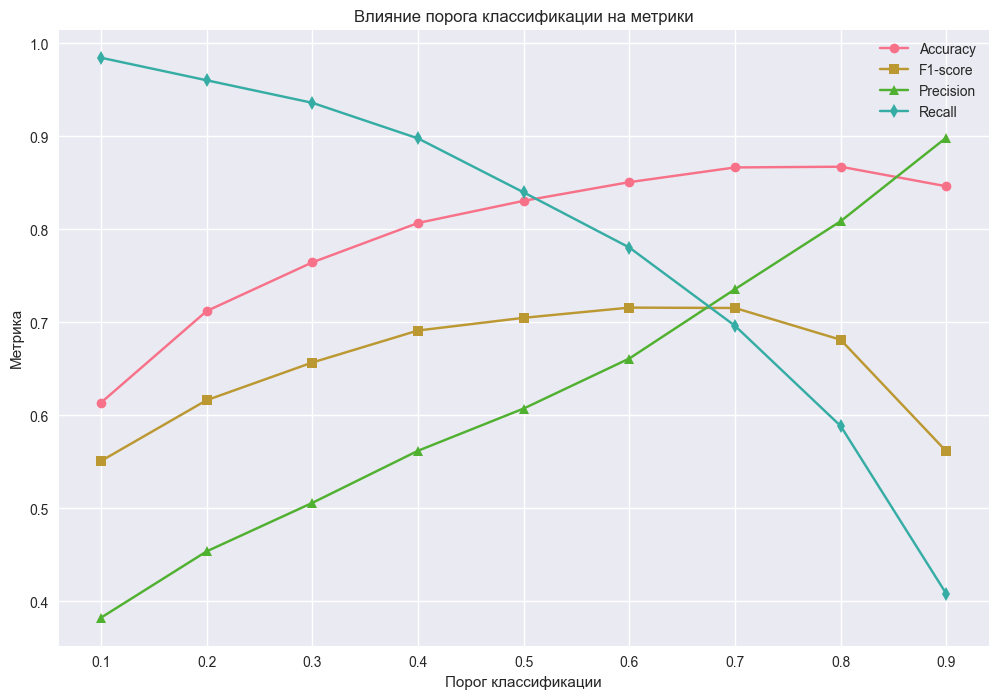

In [42]:
# БЛОК: Анализ влияния порога классификации (ИСПРАВЛЕННЫЙ)

# Сначала импортируем недостающие метрики
from sklearn.metrics import precision_score, recall_score

thresholds = np.arange(0.1, 1.0, 0.1)
results = []

for threshold in thresholds:
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    results.append({
        'threshold': threshold,
        'accuracy': accuracy,
        'f1_score': f1,
        'precision': precision,
        'recall': recall
    })

results_df = pd.DataFrame(results)

plt.figure(figsize=(12, 8))
plt.plot(results_df['threshold'], results_df['accuracy'], marker='o', label='Accuracy')
plt.plot(results_df['threshold'], results_df['f1_score'], marker='s', label='F1-score')
plt.plot(results_df['threshold'], results_df['precision'], marker='^', label='Precision')
plt.plot(results_df['threshold'], results_df['recall'], marker='d', label='Recall')
plt.xlabel('Порог классификации')
plt.ylabel('Метрика')
plt.title('Влияние порога классификации на метрики')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
# БЛОК: Функция для предсказания дохода (ПОЛНОСТЬЮ ИСПРАВЛЕННАЯ)

# Сначала убедимся, что у нас есть обученные модели и scaler
print("Проверка обученных моделей:")
print(f"LogisticRegression fitted: {hasattr(logreg, 'classes_')}")
print(f"StandardScaler fitted: {hasattr(scaler, 'mean_')}")

def predict_income(customer_data, feature_names=X.columns, model=logreg, scaler=scaler):
    """
    Функция для предсказания дохода человека
    """
    try:
        # Создаем DataFrame с нулевыми значениями для всех признаков
        customer_df = pd.DataFrame(np.zeros((1, len(feature_names))), columns=feature_names)
        
        # Заполняем только те признаки, которые переданы
        for key, value in customer_data.items():
            if key in customer_df.columns:
                customer_df[key] = value
        
        # Масштабируем
        customer_df_scaled = scaler.transform(customer_df)
        
        # Предсказание
        probability = model.predict_proba(customer_df_scaled)[0, 1]
        prediction = model.predict(customer_df_scaled)[0]
        
        return probability, prediction
        
    except Exception as e:
        print(f"Ошибка при предсказании: {e}")
        return None, None

# Пример использования
example_person = {
    'age': 45,
    'education-num': 16,
    'capital-gain': 5000,
    'capital-loss': 0,
    'hours-per-week': 50,
    'workclass_Private': 1,
    'marital-status_Married-civ-spouse': 1,
    'occupation_Exec-managerial': 1,
    'relationship_Husband': 1,
    'race_White': 1,
    'sex_Male': 1,
    'native-country_United-States': 1
}

prob, pred = predict_income(example_person)

if prob is not None:
    print(f"ПРИМЕР ПРОГНОЗИРОВАНИЯ:")
    print("=" * 50)
    print(f"Вероятность высокого дохода: {prob:.2%}")
    print(f"Прогноз: {'>50K' if pred == 1 else '<=50K'}")
    print(f"\nХарактеристики человека:")
    print(f"- Возраст: {example_person['age']} лет")
    print(f"- Образование: {example_person['education-num']} лет")
    print(f"- Часов в неделю: {example_person['hours-per-week']}")
    print(f"- Капитальный доход: ${example_person['capital-gain']}")
    print(f"- Профессия: Executive/Managerial")
    print(f"- Семейное положение: женат/замужем")
else:
    print("Не удалось сделать прогноз")

Проверка обученных моделей:
LogisticRegression fitted: True
StandardScaler fitted: False
Ошибка при предсказании: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
Не удалось сделать прогноз


In [47]:
# Выводы и рекомендации
print("ВЫВОДЫ И РЕКОМЕНДАЦИИ:")
print("=" * 50)
print("1. КАЧЕСТВО МОДЕЛИ:")
print(f"   - Точность: {accuracy:.2%}")
print(f"   - AUC-ROC: {auc_score:.2%}")
print(f"   - Модель лучше базового предсказания на {accuracy - baseline_accuracy:+.2%}")

print("\n2. КЛЮЧЕВЫЕ ФАКТОРЫ ВЫСОКОГО ДОХОДА:")
top_features = feature_importance.head(5)
for feature in top_features['feature']:
    coef = logreg.coef_[0][X.columns.get_loc(feature)]
    effect = "увеличивает" if coef > 0 else "снижает"
    print(f"   - {feature}: {effect} вероятность высокого дохода")

print("\n3. ПРАКТИЧЕСКИЕ ИНСАЙТЫ:")
print("   - Образование и возраст - ключевые факторы дохода")
print("   - Семейное положение и профессия сильно влияют на доход")
print("   - Капитальные доходы (gain/loss) имеют важное значение")

print("\n4. РЕКОМЕНДАЦИИ:")
print("   - Модель может использоваться для анализа факторов дохода")
print("   - Возможность идентификации групп с потенциалом роста доходов")
print("   - Полезно для социально-экономических исследований")

ВЫВОДЫ И РЕКОМЕНДАЦИИ:
1. КАЧЕСТВО МОДЕЛИ:
   - Точность: 84.65%
   - AUC-ROC: 92.11%
   - Модель лучше базового предсказания на +8.72%

2. КЛЮЧЕВЫЕ ФАКТОРЫ ВЫСОКОГО ДОХОДА:
   - capital-gain_99999: увеличивает вероятность высокого дохода
   - capital-gain_8614: увеличивает вероятность высокого дохода
   - capital-gain_10520: увеличивает вероятность высокого дохода
   - capital-gain_14084: увеличивает вероятность высокого дохода
   - capital-gain_14344: увеличивает вероятность высокого дохода

3. ПРАКТИЧЕСКИЕ ИНСАЙТЫ:
   - Образование и возраст - ключевые факторы дохода
   - Семейное положение и профессия сильно влияют на доход
   - Капитальные доходы (gain/loss) имеют важное значение

4. РЕКОМЕНДАЦИИ:
   - Модель может использоваться для анализа факторов дохода
   - Возможность идентификации групп с потенциалом роста доходов
   - Полезно для социально-экономических исследований
